In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [358]:
data=pd.read_csv("train.csv")

In [359]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


POSTED_BY	-------------------------------->    posted by (owner/dealer)
UNDER_CONSTRUCTION ------------------------->    is underconstruction or not (1=yes , 0=NO)
RERA  -------------------------------------->    is authorised by Real Estate Regulatory Authority  (1=yes , 0=NO)
BHK_OR_RK ---------------------------------->    BHK- bedroom, hall and kitchen  , RK- room kitchen
BHK_NO. ------------------------------------>    the number of rooms in a property. 
SQUARE_FT ---------------------------------->    area of the property.
READY_TO_MOVE ------------------------------>    is ready to move or not (1=yes , 0=NO)
RESALE ------------------------------------->    Is resaling property or not
ADDRESS ------------------------------------>    address of locality
LONGITUDE ---------------------------------->    longitude of the property
LATITUDE  ---------------------------------->    latitude of the property
TARGET(PRICE_IN_LACS) ---------------------->    price of property in lacs

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [361]:
data.shape

(29451, 12)

In [362]:
data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [363]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [364]:
data["UNDER_CONSTRUCTION"].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

In [365]:
data["RERA"].value_counts()

0    20088
1     9363
Name: RERA, dtype: int64

In [366]:
data["BHK_NO."].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

In [367]:
data["READY_TO_MOVE"].value_counts()

1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64

In [368]:
data["RESALE"].value_counts()

1    27377
0     2074
Name: RESALE, dtype: int64

In [369]:
data.isna().sum().sum()

0

In [370]:
data['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

C:\Users\kingr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


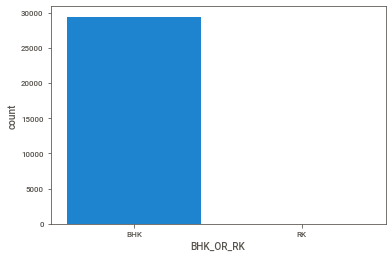

In [371]:
sns.countplot("BHK_OR_RK",data=data)

here, we cans see that bhk_or_rk class is highly unbalanced as BHK has around 29000 entries but Rk has only 24. so, we can drop this coloumn

C:\Users\kingr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kingr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kingr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kingr\anaconda3\lib\si

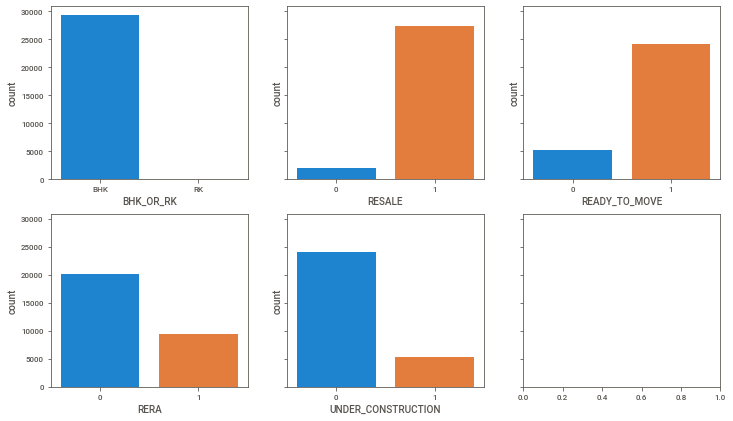

In [372]:

fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("BHK_OR_RK", data=data, ax=axes[0,0])
sns.countplot("RESALE", data=data, ax=axes[0,1])
sns.countplot("READY_TO_MOVE", data=data, ax=axes[0,2])
sns.countplot("RERA", data=data, ax=axes[1,0])
sns.countplot("UNDER_CONSTRUCTION", data=data, ax=axes[1,1])

In [373]:
#!pip install sweetviz

In [374]:
import sweetviz as st
report= st.analyze(data)
report.show_html("./report.html")


Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [375]:
data["CITY"] = data["ADDRESS"].apply(lambda x: x.split(",")[1])
data["LOCALITY"] = data["ADDRESS"].apply(lambda x: x.split(",")[0])
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,LOCALITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Jigani
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Sector-1 Vaishali
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,New Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra,Shamshabad Road
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Lake View Recidency,E3-108
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,Ajmer Road
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,Sholinganallur


In [376]:
data.drop(['ADDRESS','BHK_OR_RK'], axis=1, inplace=True)

In [377]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,LOCALITY
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,Ksfc Layout
1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,Mysore,Vishweshwara Nagar
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,Jigani
3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad,Sector-1 Vaishali
4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,Kolkata,New Town
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,Agra,Shamshabad Road
29447,Owner,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,Lake View Recidency,E3-108
29448,Dealer,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,Jaipur,Ajmer Road
29449,Owner,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,Chennai,Sholinganallur


In [378]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [379]:
data['CITY']=le.fit_transform(data['CITY'])

In [380]:
data['LOCALITY']=le.fit_transform(data['LOCALITY'])

In [381]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,LOCALITY
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,167,2414
1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,313,5593
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,167,1934
3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,227,4339
4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,285,3275


In [382]:
data.drop(['POSTED_BY'], axis=1, inplace=True)

In [383]:
data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,LOCALITY
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,167,2414
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,313,5593
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,167,1934
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,227,4339
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,285,3275


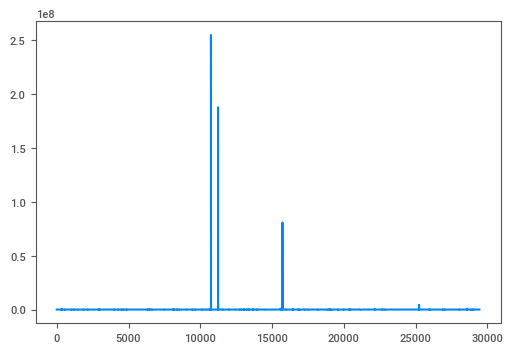

In [384]:
plt.plot(data['SQUARE_FT'])

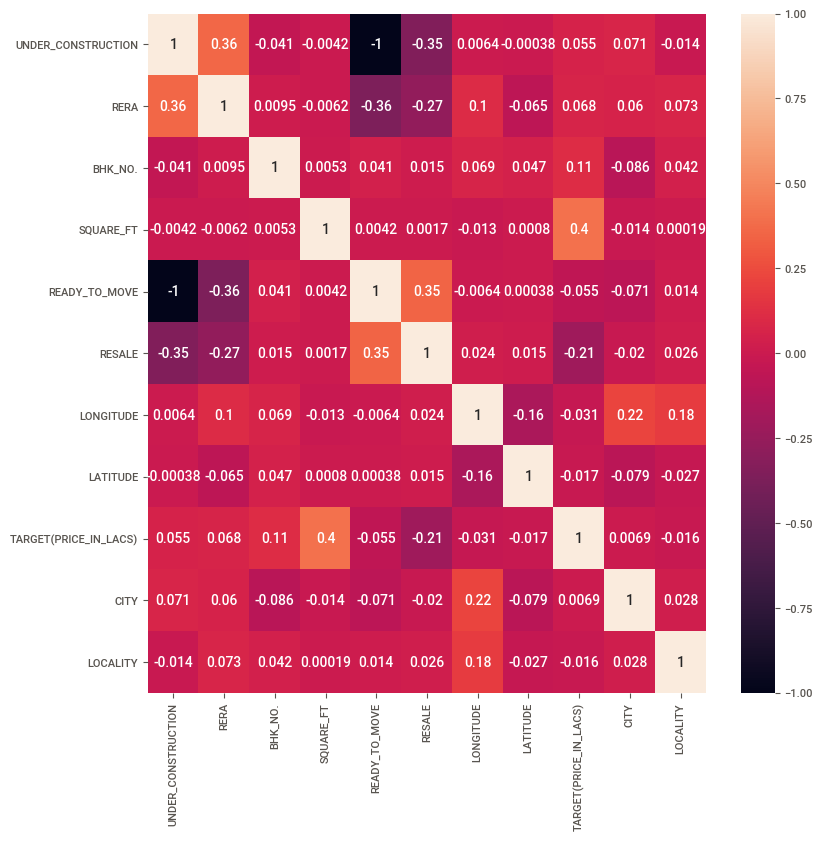

In [385]:
plt.figure(figsize = (9,9))
sns.heatmap(data.corr(),annot = True)

under construction and ready to move are highly correlated

In [386]:
data.drop(['READY_TO_MOVE','LONGITUDE','LATITUDE'], axis=1, inplace=True)

In [387]:
data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,TARGET(PRICE_IN_LACS),CITY,LOCALITY
0,0,0,2,1300.236407,1,55.0,167,2414
1,0,0,2,1275.000000,1,51.0,313,5593
2,0,0,2,933.159722,1,43.0,167,1934
3,0,1,2,929.921143,1,62.5,227,4339
4,1,0,2,999.009247,1,60.5,285,3275


In [388]:
X=data[['UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT','RESALE','CITY','LOCALITY']]
Y=data[['TARGET(PRICE_IN_LACS)']]

In [389]:
X.head(-1)


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,CITY,LOCALITY
0,0,0,2,1300.236407,1,167,2414
1,0,0,2,1275.000000,1,313,5593
2,0,0,2,933.159722,1,167,1934
3,0,1,2,929.921143,1,227,4339
4,1,0,2,999.009247,1,285,3275
...,...,...,...,...,...,...,...
29445,0,0,2,1062.134891,1,174,5247
29446,0,0,3,2500.000000,1,145,4765
29447,0,0,2,769.230769,1,52,1295
29448,0,0,2,1022.641509,1,255,134


In [390]:
Y.head(-1)

,TARGET(PRICE_IN_LACS)
0,55.0
1,51.0
2,43.0
3,62.5
4,60.5
...,...
29445,40.0
29446,45.0
29447,16.0
29448,27.1


In [391]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UNDER_CONSTRUCTION  29451 non-null  int64  
 1   RERA                29451 non-null  int64  
 2   BHK_NO.             29451 non-null  int64  
 3   SQUARE_FT           29451 non-null  float64
 4   RESALE              29451 non-null  int64  
 5   CITY                29451 non-null  int32  
 6   LOCALITY            29451 non-null  int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 1.3 MB


In [392]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8 , random_state=50)

In [393]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

<ipython-input-393-54f74af19ac7>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor()

In [394]:
y_pred= model.predict(X_test)

In [395]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)*100

96.5133553789519

In [396]:
import keras

In [406]:
model1 = keras.models.Sequential()

model1.add(keras.layers.Dense(7, activation='relu', input_shape=(7,)))
model1.add(keras.layers.Dense(7, activation='relu'))
model1.add(keras.layers.Dense(7, activation='relu'))
model1.add(keras.layers.Dense(7, activation='relu'))
model1.add(keras.layers.Dense(1))

model1.compile(optimizer='adam', loss='mean_squared_error')

In [411]:
model1.fit(X, Y, epochs=30)

Epoch 1/30
921/921 [==============================] - 5s 6ms/step - loss: 200522.7188
Epoch 2/30
921/921 [==============================] - 5s 5ms/step - loss: 198791.7969: 0s - loss: 2
Epoch 3/30
921/921 [==============================] - 5s 6ms/step - loss: 198676.3438
Epoch 4/30
921/921 [==============================] - 5s 5ms/step - loss: 198359.6875
Epoch 5/30
921/921 [==============================] - 4s 5ms/step - loss: 204823.8906
Epoch 6/30
921/921 [==============================] - 4s 4ms/step - loss: 206538.6719
Epoch 7/30
921/921 [==============================] - 5s 5ms/step - loss: 201235.6094
Epoch 8/30
921/921 [==============================] - 5s 6ms/step - loss: 220582.4844
Epoch 9/30
921/921 [==============================] - 5s 5ms/step - loss: 2865420.2500
Epoch 10/30
921/921 [==============================] - 5s 5ms/step - loss: 1555623.8750
Epoch 11/30
921/921 [==============================] - 5s 5ms/step - loss: 326297.4062
Epoch 12/30
921/921 [===============

In [412]:
test_data = np.array([0,1,2,929.921143,1,227,4339])
print(model.predict(test_data.reshape(1,7)))

[54.419]


In [413]:
test_data = np.array([0,1,2,929.921143,1,227,4339])
print(model1.predict(test_data.reshape(1,7), batch_size=1))

[[54.18799]]


In [415]:
test_data = np.array([1,0,2,999.009247,1,285,3275])
print(model1.predict(test_data.reshape(1,7), batch_size=1))

[[46.0418]]
